# Fitting vs Non-Fitting initial condition 

## Design choice
In many problems with ODE, we might decide to also fit the initial conditions for some of the state variables, to garner more insight and incorporate uncertainty into the inverse model. Here is how to do so. For this purpose, we are again going to use a simple example with sine wave.


Consider this problem, which can be solved explicitly, but to be used here for demonstration purposes only.
$$
\frac{dy}{dt} = A\sin(\omega t + \delta)
$$

Here is the example of the dataset given in the paper, directly copied here for the ease of use.

In [1]:
### Dataset
import numpy as np

data = {'Time': np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ]), 'y': np.array([0.91963291, 0.99361406, 1.27816619, 1.83477302, 2.0436977 ,
       2.4108738 , 2.84511313, 2.98244074, 3.01343352, 2.81703372,
       2.66941941, 2.31326251, 1.89208529, 1.40799057, 1.2468084 ,
       1.08452949, 1.03682804, 1.22276976, 1.58095538, 1.73274129,
       2.41068701, 2.6162268 , 3.08196062, 3.0313903 , 2.77556916,
       2.75105715, 2.46021415, 1.85709704, 1.60617448, 1.22300332,
       1.03747336, 1.20756063, 1.10867505, 1.42444299, 1.68301796,
       2.09068759, 2.61731029, 2.42544506, 2.97204288, 2.97302454,
       2.98836389, 2.63614576, 2.06298576, 1.73999305, 1.4090971 ,
       1.12819288, 0.92043848, 1.20091581, 1.29993016, 1.38187416])}

Next we defined the ODE equations, keeping everying same as given in the paper.

## General structure

In [2]:
def sine(y, t, A, omega, delta):
    dy_dt = A * omega * np.sin(omega * t + delta)
    return dy_dt

In [3]:
def simulate_model(params):
    y0 = params['y0']
    A = params['A']
    omega = params['omega']
    delta = params['delta']
    sol = odeint(sine, y0, time, args=(A, omega, delta))
    return sol.flatten()



Next, we define an error function, this error function, depends on the data and the model predicted outcomes. The optimizer minimizes this error function

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
import sys
import scipy.io
from concurrent.futures import ProcessPoolExecutor

# Get path 
# Get path to MCMCwithODEs_primer (3 levels up)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..','..','..'))
sys.path.insert(0, project_root)

import sys
sys.path.append('./..')  # or absolute path if needed

from invode import ODEOptimizer, lhs_sample, MSE

## Fitting data without fitting initial conditions 



Fitting Progress:  20%|██████████                                        | 2/10 [00:00<00:00, 12.44it/s]


Iteration 1/10
Best error so far: 0.0319
Best params: {'A': 1.168140028142529, 'delta': -0.07720727336595459, 'omega': 2.002175593725135, 'y0': 0.91963291}

Iteration 2/10
Best error so far: 0.0182
Best params: {'A': 1.045811159026857, 'delta': -0.09555069889028689, 'omega': 2.019658360998068, 'y0': 0.91963291}

Iteration 3/10
Best error so far: 0.0182
Best params: {'A': 1.045811159026857, 'delta': -0.09555069889028689, 'omega': 2.019658360998068, 'y0': 0.91963291}

Iteration 4/10


Fitting Progress:  60%|██████████████████████████████                    | 6/10 [00:00<00:00, 10.39it/s]

Best error so far: 0.0182
Best params: {'A': 1.045811159026857, 'delta': -0.09555069889028689, 'omega': 2.019658360998068, 'y0': 0.91963291}

Iteration 5/10
Best error so far: 0.0157
Best params: {'A': 1.0381311197585252, 'delta': 0.0690081293687369, 'omega': 1.9756783522432801, 'y0': 0.91963291}

Iteration 6/10
Best error so far: 0.0140
Best params: {'A': 1.0512865035769332, 'delta': 0.005383119169489824, 'omega': 1.9972166389138954, 'y0': 0.91963291}

Iteration 7/10


Fitting Progress:  80%|████████████████████████████████████████          | 8/10 [00:00<00:00, 10.03it/s]

Best error so far: 0.0140
Best params: {'A': 1.0512865035769332, 'delta': 0.005383119169489824, 'omega': 1.9972166389138954, 'y0': 0.91963291}

Iteration 8/10
Best error so far: 0.0138
Best params: {'A': 1.0534301206226777, 'delta': 0.03978869678111113, 'omega': 1.989053169627678, 'y0': 0.91963291}

Iteration 9/10
Best error so far: 0.0138
Best params: {'A': 1.0534301206226777, 'delta': 0.03978869678111113, 'omega': 1.989053169627678, 'y0': 0.91963291}

Iteration 10/10


Fitting Progress: 100%|█████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.20it/s]

Best error so far: 0.0138
Best params: {'A': 1.056545607148581, 'delta': 0.03356573590691905, 'omega': 1.989016717607897, 'y0': 0.91963291}
Refining params: {'A': 1.056545607148581, 'delta': 0.03356573590691905, 'omega': 1.989016717607897}

[Local Optimization]
Refined parameters: {'A': 1.0560379324115068, 'delta': 0.022068060110714268, 'omega': 1.9917066486447972, 'y0': 0.91963291}
Refined error: 0.013748738280660198
Refining params: {'A': 0.9857635297013816, 'delta': 0.039353080625156134, 'omega': 1.9769982477129306}

[Local Optimization]
Refined parameters: {'A': 1.0561353521005803, 'delta': 0.022018923113811893, 'omega': 1.9917261237026258, 'y0': 0.91963291}
Refined error: 0.013748726040091095
After local refinement:
Best params: {'A': 1.0561353521005803, 'delta': 0.022018923113811893, 'omega': 1.9917261237026258, 'y0': 0.91963291}
Best error: 0.0137


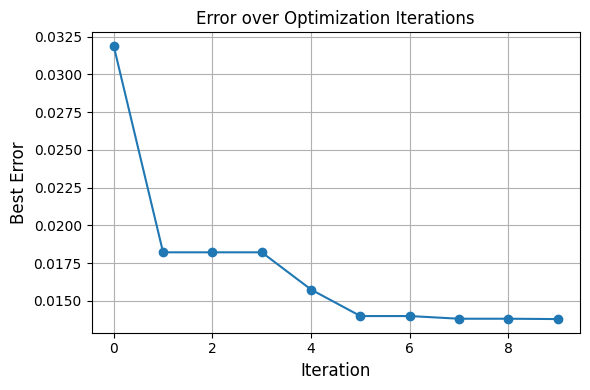

({'A': 1.0561353521005803,
  'delta': 0.022018923113811893,
  'omega': 1.9917261237026258,
  'y0': 0.91963291},
 0.013748726040091095)

In [5]:
param_bounds = {
    'y0': 0.91963291, # fixed
    'A': (0.2, 1.5),
    'delta': (-0.5, 0.5),
    'omega': (0.5, 4)
}

mse_func = MSE(data['y'])
time = (data['Time'])

def mse(y_pred):
    error = mse_func(y_pred)
    return error


optimizer = ODEOptimizer(
    ode_func=simulate_model,
    error_func=mse,
    param_bounds=param_bounds,
    seed=42,
    num_top_candidates=2,
    n_samples=300,
    num_iter=10,
    verbose=True,
    verbose_plot=True
)

optimizer.fit()

## Fitting initial conditions too

Fitting Progress:   0%|                                                          | 0/10 [00:00<?, ?it/s]


Iteration 1/10


Fitting Progress:  20%|██████████                                        | 2/10 [00:00<00:00,  8.31it/s]

Best error so far: 0.0168
Best params: {'y0': 0.9564405848513244, 'A': 0.9911283621963101, 'delta': -0.010443730713275506, 'omega': 2.008637875754034}

Iteration 2/10
Best error so far: 0.0168
Best params: {'y0': 0.9564405848513244, 'A': 0.9911283621963101, 'delta': -0.010443730713275506, 'omega': 2.008637875754034}

Iteration 3/10
Best error so far: 0.0133
Best params: {'y0': 1.0370965121855702, 'A': 0.9971240229938314, 'delta': -0.11476876194661023, 'omega': 2.00726873303206}


Fitting Progress:  50%|█████████████████████████                         | 5/10 [00:00<00:00,  9.07it/s]


Iteration 4/10
Best error so far: 0.0133
Best params: {'y0': 1.0370965121855702, 'A': 0.9971240229938314, 'delta': -0.11476876194661023, 'omega': 2.00726873303206}

Iteration 5/10
Best error so far: 0.0133
Best params: {'y0': 1.0370965121855702, 'A': 0.9971240229938314, 'delta': -0.11476876194661023, 'omega': 2.00726873303206}


Fitting Progress:  60%|██████████████████████████████                    | 6/10 [00:00<00:00,  9.19it/s]


Iteration 6/10
Best error so far: 0.0133
Best params: {'y0': 1.0370965121855702, 'A': 0.9971240229938314, 'delta': -0.11476876194661023, 'omega': 2.00726873303206}

Iteration 7/10
Best error so far: 0.0133
Best params: {'y0': 1.0370965121855702, 'A': 0.9971240229938314, 'delta': -0.11476876194661023, 'omega': 2.00726873303206}

Iteration 8/10


Fitting Progress:  90%|█████████████████████████████████████████████     | 9/10 [00:00<00:00,  9.61it/s]

Best error so far: 0.0133
Best params: {'y0': 1.0370965121855702, 'A': 0.9971240229938314, 'delta': -0.11476876194661023, 'omega': 2.00726873303206}

Iteration 9/10
Best error so far: 0.0133
Best params: {'y0': 1.0370965121855702, 'A': 0.9971240229938314, 'delta': -0.11476876194661023, 'omega': 2.00726873303206}

Iteration 10/10
Best error so far: 0.0133
Best params: {'y0': 1.0370965121855702, 'A': 0.9971240229938314, 'delta': -0.11476876194661023, 'omega': 2.00726873303206}


Fitting Progress: 100%|█████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.35it/s]

Refining params: {'y0': 1.0226316288325035, 'A': 0.9379243591192203, 'delta': -0.06491279874211497, 'omega': 2.001752259384231}

[Local Optimization]
Refined parameters: {'y0': 1.0100147233268784, 'A': 0.9952796216949615, 'delta': 0.008061469875085391, 'omega': 1.9935965453448987}
Refined error: 0.01070958836934748
Refining params: {'y0': 1.0853306550710178, 'A': 0.9645118937574587, 'delta': -0.15009082836065596, 'omega': 2.0305593250774443}

[Local Optimization]
Refined parameters: {'y0': 1.0112583091783667, 'A': 0.994536192791167, 'delta': 0.012313818730878173, 'omega': 1.9929776210516146}
Refined error: 0.010706618088041938
After local refinement:
Best params: {'y0': 1.0112583091783667, 'A': 0.994536192791167, 'delta': 0.012313818730878173, 'omega': 1.9929776210516146}
Best error: 0.0107


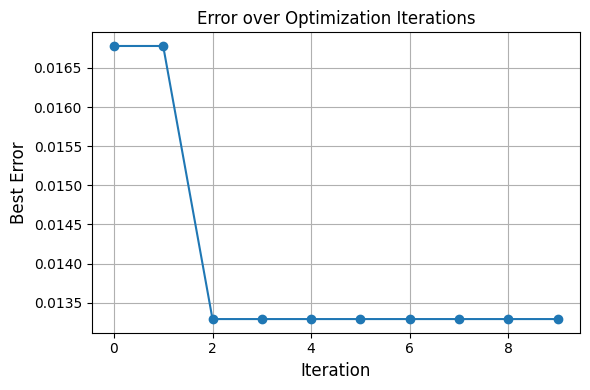

({'y0': 1.0112583091783667,
  'A': 0.994536192791167,
  'delta': 0.012313818730878173,
  'omega': 1.9929776210516146},
 0.010706618088041938)

In [6]:
param_bounds = {
    'y0': (0.5,1.5), # to be fit
    'A': (0.2, 1.5),
    'delta': (-0.5, 0.5),
    'omega': (0.5, 4)
}

optimizer_init = ODEOptimizer(
    ode_func=simulate_model,
    error_func=mse,
    param_bounds=param_bounds,
    seed=42,
    num_top_candidates=2,
    n_samples=300,
    num_iter=10,
    verbose=True,
    verbose_plot=True
)

optimizer_init.fit()

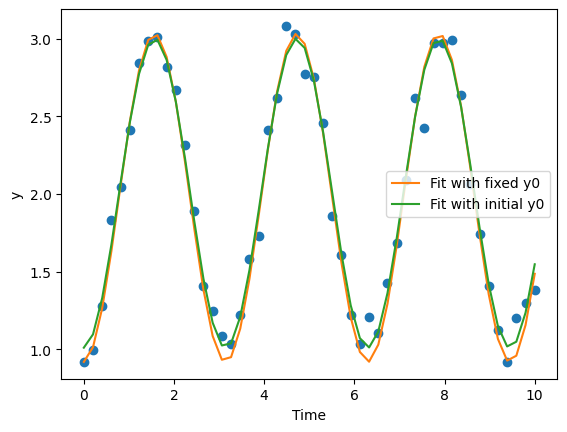

In [7]:
best_params = optimizer.best_params
best_fit = simulate_model(best_params)
best_params_init = optimizer_init.best_params
best_fit_init = simulate_model(best_params_init)


plt.plot(time,data['y'],'o')
plt.plot(time, best_fit, label='Fit with fixed y0')
plt.plot(time, best_fit_init, label='Fit with initial y0')
plt.xlabel("Time")
plt.ylabel("y")
plt.legend()

# Fitting replicates

Now say, we have more than one replicates, and we want to use both of them to fit the model.

In [9]:
 data['y2'] = np.array([1.07361151, 1.21215491, 1.36986155, 1.73030932, 2.24416725,
       2.47450877, 2.82265203, 3.13303415, 2.94237672, 2.78331504,
       2.77477332, 2.30881575, 1.6857773 , 1.40179982, 1.2266223 ,
       0.9546354 , 1.01174233, 1.18537267, 1.73544263, 1.88389243,
       2.23405254, 2.51444005, 2.87471318, 3.13975545, 3.01464544,
       2.83216673, 2.37472724, 1.85761546, 1.59781841, 1.42317129,
       1.10927539, 1.20052413, 1.27366477, 1.4107367 , 1.5436671 ,
       2.34982742, 2.44866863, 2.93237762, 2.97178479, 2.9309714 ,
       2.87300688, 2.55836086, 2.14322125, 1.72324544, 1.51411578,
       1.03109252, 0.99742575, 0.95494922, 1.28432555, 1.62262172])

{'Time': array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
         5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
         6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
         7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
         8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
         9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ]),
 'y': array([0.91963291, 0.99361406, 1.27816619, 1.83477302, 2.0436977 ,
        2.4108738 , 2.84511313, 2.98244074, 3.01343352, 2.81703372,
        2.66941941, 2.31326251, 1.89208529, 1.40799057, 1.2468084 ,
        1.08452949, 1.03682804, 1.22276976, 1.58095

In [26]:
from invode import ChiSquaredMSE

data_mean =  np.mean(np.array([data['y'], data['y2']]), axis=0)
data_sigma = np.std(np.array([data['y'], data['y2']]), axis=0)
                    
chi2_func = ChiSquaredMSE(data_mean, data_sigma)
time = (data['Time'])

def error_func_replicates(y_pred):
    error = chi2_func(y_pred)
    return error

Fitting Progress:  20%|██████████                                        | 2/10 [00:00<00:00, 10.46it/s]


Iteration 1/10
Best error so far: 114449.9848
Best params: {'y0': 0.9001526367210391, 'A': 1.028159496849852, 'delta': -0.09996629527932621, 'omega': 2.037668836633527}

Iteration 2/10
Best error so far: 114449.9848
Best params: {'y0': 0.9001526367210391, 'A': 1.028159496849852, 'delta': -0.09996629527932621, 'omega': 2.037668836633527}

Iteration 3/10
Best error so far: 114449.9848
Best params: {'y0': 0.9001526367210391, 'A': 1.028159496849852, 'delta': -0.09996629527932621, 'omega': 2.037668836633527}

Iteration 4/10


Fitting Progress:  50%|█████████████████████████                         | 5/10 [00:00<00:00,  9.67it/s]

Best error so far: 65171.6810
Best params: {'y0': 0.5439508248536276, 'A': 1.2537223140161797, 'delta': -0.23253618647506347, 'omega': 2.023521873910594}

Iteration 5/10
Best error so far: 65171.6810
Best params: {'y0': 0.5439508248536276, 'A': 1.2537223140161797, 'delta': -0.23253618647506347, 'omega': 2.023521873910594}

Iteration 6/10
Best error so far: 65171.6810
Best params: {'y0': 0.5439508248536276, 'A': 1.2537223140161797, 'delta': -0.23253618647506347, 'omega': 2.023521873910594}

Iteration 7/10


Fitting Progress:  80%|████████████████████████████████████████          | 8/10 [00:00<00:00,  9.70it/s]

Best error so far: 65171.6810
Best params: {'y0': 0.5439508248536276, 'A': 1.2537223140161797, 'delta': -0.23253618647506347, 'omega': 2.023521873910594}

Iteration 8/10
Best error so far: 65171.6810
Best params: {'y0': 0.5439508248536276, 'A': 1.2537223140161797, 'delta': -0.23253618647506347, 'omega': 2.023521873910594}

Iteration 9/10
Best error so far: 65171.6810
Best params: {'y0': 0.5439508248536276, 'A': 1.2537223140161797, 'delta': -0.23253618647506347, 'omega': 2.023521873910594}

Iteration 10/10


Fitting Progress: 100%|█████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.81it/s]


Best error so far: 65171.6810
Best params: {'y0': 0.5439508248536276, 'A': 1.2537223140161797, 'delta': -0.23253618647506347, 'omega': 2.023521873910594}
Refining params: {'y0': 0.6842069991662677, 'A': 1.1542704360842206, 'delta': -0.09268111484809301, 'omega': 2.0216642544629475}

[Local Optimization]
Refined parameters: {'y0': 1.0544409173231115, 'A': 0.9623682222023404, 'delta': -0.1170877556466916, 'omega': 2.0454085116455185}
Refined error: 6361.016522641541
Refining params: {'y0': 0.5609434685651457, 'A': 1.2196578309637716, 'delta': 0.03921739112415468, 'omega': 2.0132279835033153}

[Local Optimization]
Refined parameters: {'y0': 1.050844854892481, 'A': 0.9602834768065078, 'delta': -0.03661762511259229, 'omega': 2.0307489988031215}
Refined error: 7083.258839718901
After local refinement:
Best params: {'y0': 1.0544409173231115, 'A': 0.9623682222023404, 'delta': -0.1170877556466916, 'omega': 2.0454085116455185}
Best error: 6361.0165


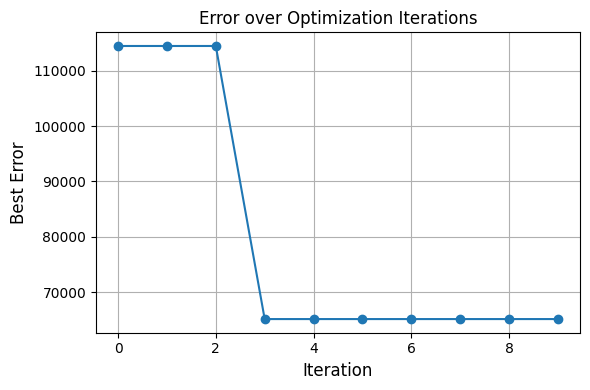

({'y0': 1.0544409173231115,
  'A': 0.9623682222023404,
  'delta': -0.1170877556466916,
  'omega': 2.0454085116455185},
 6361.016522641541)

In [28]:
param_bounds = {
    'y0': (0.5,1.5), # to be fit
    'A': (0.2, 1.5),
    'delta': (-0.5, 0.5),
    'omega': (0.5, 4)
}

optimizer_replicates = ODEOptimizer(
    ode_func=simulate_model,
    error_func=error_func_replicates,
    param_bounds=param_bounds,
    seed=42,
    num_top_candidates=2,
    n_samples=300,
    num_iter=10,
    verbose=True,
    verbose_plot=True
)

optimizer_replicates.fit()

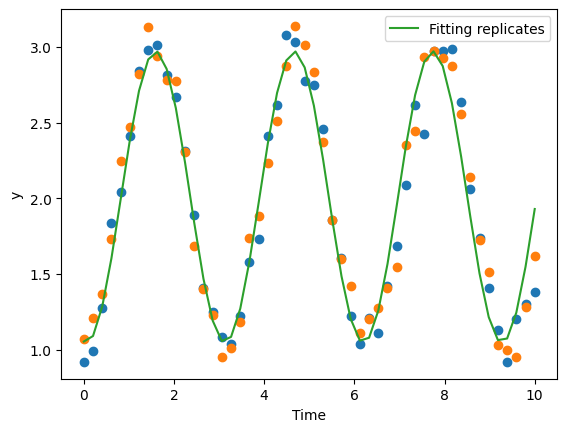

In [29]:
best_params_repli = optimizer_replicates.best_params
best_fit_repli = simulate_model(best_params_repli)


plt.plot(time,data['y'],'o')
plt.plot(time,data['y2'],'o')
plt.plot(time, best_fit_repli, label='Fitting replicates')
plt.xlabel("Time")
plt.ylabel("y")
plt.legend()